# Часть 1. Проверка гипотезы в Python и составление аналитической записки

- Автор: Сенникова Алёна
- Дата: 12.10.2025

## Цели и задачи проекта


**Цель проекта** 

Проверить гипотезу о различии поведения пользователей Яндекс Книг из двух городов России — Москвы и Санкт-Петербурга.

Определить, проводят ли пользователи из Санкт-Петербурга в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.

**Задачи проекта**

1. Загрузка и подготовка данных
    - импортировать файл `yandex_knigi_data.csv`
    - проверить данные на наличие пропусков и дубликатов
2. Исследовательский анализ данных (EDA)
    - изучить размер выборок по городам
    - рассчитать описательные статистики (среднее, медиану, дисперсию, стандартное отклонение)
    - визуализировать распределения времени активности пользователей
3. Проверка гипотезы
    - сформулировать гипотезы
    - выбрать и провести соответствующий t-тест для двух независимых выборок
    - вычислить p-value и сделать вывод о статистической значимости различий
4. Интерпретация результатов
    - сформулировать вывод на основе p-value
    - предложить возможные объяснения различий между группами
    - сделать заключение о принятии или отклонении гипотезы

## Описание данных

Для анализа используются данные пользователей **Яндекс Книги** из Москвы и Санкт-Петербурга c суммой часов их активности.

Описание датасета `yandex_knigi_data.csv`:

- `Unnamed: 0` - индекс строки
- `city` - город пользователя — Москва или Санкт-Петербург
- `puid` - уникальный идентификатор пользователя
- `hours` - суммарное количество часов активности пользователя в приложении за весь период наблюдения

Размер выборки: **8784** наблюдения.

## Содержимое проекта


1. **Цель и задачи исследования**  
   Проверка гипотезы о том, что пользователи из Санкт-Петербурга проводят больше времени в Яндекс Книгах, чем пользователи из Москвы.

2. **Подготовка данных**  
   Загрузка датасета, проверка пропусков и дубликатов, очистка данных.

3. **Исследовательский анализ (EDA)**  
   Сравнение размеров выборок, описательная статистика, визуализация распределений.

4. **Проверка гипотезы**  
   Проведение одностороннего t-теста для двух независимых выборок, расчёт p-value и интерпретация результата.

5. **Выводы и интерпретация**  
   Формулировка итогов проверки гипотезы и возможных причин различий между группами.


## Загрузка данных и знакомство с ними

Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

### Импорт библиотек и загрузка датасета

Импортируем необходимые библиотеки и загрузим файл `yandex_knigi_data.csv`.  
В анализе будут использоваться библиотеки `pandas`, `numpy`, `matplotlib` и `seaborn` — для работы с данными и визуализации.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Загружаем данные в датафрейм
df = pd.read_csv('/datasets/yandex_knigi_data.csv')

# Выводим первые строки
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


Данные успешно загружены, в таблице содержится 4 столбца.

### Общая информация о данных

Выведем основную информацию о датафрейме, чтобы понять структуру, типы данных и наличие пропусков.

In [3]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


**Пропусков нет**, все значения заполнены.

Типы данных: числовые - `int64`, `float64` и категориальные -`object`.

Посмотрим на названия столбцов и их корректность.

In [4]:
# Выводим названия столбцов

df.columns

Index(['Unnamed: 0', 'city', 'puid', 'hours'], dtype='object')

Названия корректны, однако столбец `Unnamed: 0` не несёт смысловой нагрузки — его можно удалить.

In [5]:
# Удаляем столбец
df = df.drop(columns = ['Unnamed: 0'])

# Проверяем, что столбец успешно удалён
df.head()

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


### Проверка дубликатов

Проверим наличие дубликатов по всем строкам и отдельно по идентификатору пользователя `puid`.

In [6]:
# Считаем количество полных дубликатов
df.duplicated().sum()

0

In [7]:
# Считаем количество дубликатов по идентификатору пользователя
df.duplicated(subset = 'puid').sum()

244

**244** пользователя встречаются в данных более одного раза, посмотрим на эти строки.

In [8]:
# Выводим первые 10 строк с дубликатами
df[df.duplicated(subset = 'puid', keep=False)].sort_values('puid').head(10)

,city,puid,hours
35,Москва,2637041,10.317371
6247,Санкт-Петербург,2637041,3.883926
134,Москва,9979490,32.415573
6274,Санкт-Петербург,9979490,1.302997
145,Москва,10597984,42.931506
6279,Санкт-Петербург,10597984,9.041320
150,Москва,10815097,9.086655
6283,Санкт-Петербург,10815097,0.323291
187,Москва,13626259,21.104167
6300,Санкт-Петербург,13626259,1.648434


Делаем вывод, что в данных есть пользователи, присутствующие **одновременно в двух городах**. Но для корректного проведения **t-теста** выборки должны быть независимыми. **Удалим** таких пользователей, чтобы не получить искажённые результаты.

In [9]:
# Удаляем все дубликаты по столбцу puid
df = df.drop_duplicates(subset = 'puid', keep = False)

Теперь каждая запись в таблице соответствует уникальному пользователю из одного города.

## Исследовательский анализ данных (EDA)

### Размер выборок по городам

Посмотрим, сколько пользователей в каждой группе — Москве и Санкт-Петербурге.

In [10]:
# Рассчитываем количество пользователей по городам
city_counts = df['city'].value_counts()

city_counts

Москва             5990
Санкт-Петербург    2306
Name: city, dtype: int64

Визуализируем количество пользователей.

Text(0.5, 1.0, 'Распределение пользователей по городам')

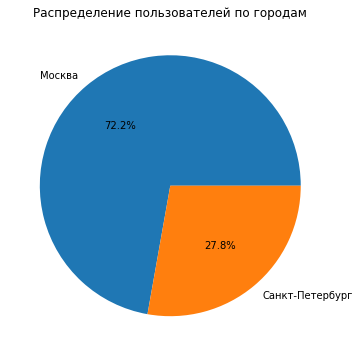

In [11]:
# Строим круговую диаграмму
plt.figure(figsize = (6, 6))
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Распределение пользователей по городам')

В данных действительно представлены пользователи только из двух городов.

Размеры выборок отличаются почти в **2.6 раза**, поэтому при статистической проверке гипотезы необходимо учитывать возможное **неравенство дисперсий** - лучше использовать тест Уэлча.

Несмотря на разницу в объёме групп, обе выборки достаточно большие для применения параметрических тестов.

### Описательные статистики

Рассчитаем ключевые статистические показатели по времени активности для каждой группы.

In [12]:
# Выводим основные показатели по городам
df.groupby('city')['hours'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Москва,5990.0,10.848192,36.925622,0.000022,0.057042,0.888232,5.933439,857.209373
Санкт-Петербург,2306.0,11.264433,39.831755,0.000025,0.060173,0.875355,6.138424,978.764775


Среднее время активности в Санкт-Петербурге **(11.26)** немного выше, чем в Москве **(10.85)**.  

Разброс значений большой в обеих группах, что указывает на наличие сильно активных пользователей - выбросов.

### Визуализация распределения времени активности пользователей

Построим **гистограммы** и **boxplot**, чтобы визуально сравнить распределения по городам.

Text(0, 0.5, 'Количество пользователей')

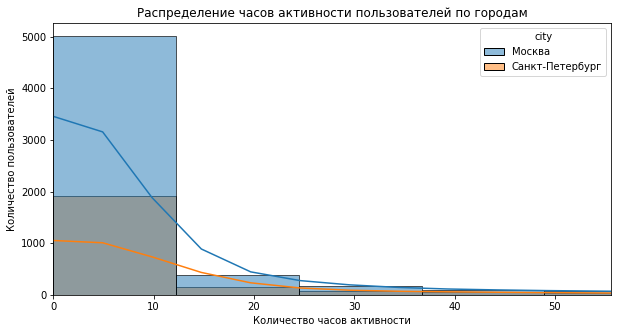

In [13]:
# Строим гистограмму распределения часов
plt.figure(figsize=(10, 5))
sns.histplot(data = df, x = 'hours', hue = 'city', bins = 80, kde = True)
plt.xlim(0, df['hours'].quantile(0.95))
plt.title('Распределение часов активности пользователей по городам')
plt.xlabel('Количество часов активности')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество часов активности')

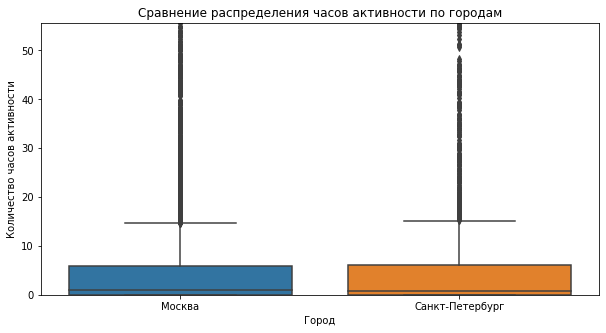

In [14]:
# Строим boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'city', y = 'hours')
plt.ylim(0, df['hours'].quantile(0.95))
plt.title('Сравнение распределения часов активности по городам')
plt.xlabel('Город')
plt.ylabel('Количество часов активности')

Распределения по обоим городам сильно **скошены вправо** - большинство пользователей проводят в приложении менее 1 часа, а небольшое количество пользователей показывает экстремально высокие значения.  

Boxplot подтверждает **наличие выбросов** и длинного «хвоста».  

Для проверки гипотезы будем использовать t-тест, устойчивый к неравенству дисперсий - **тест Уэлча**.

## Проверка гипотезы в Python

### Формулировка гипотез

**Гипотеза**: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. 

- Нулевая гипотеза **H₀**: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза **H₁**: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [15]:
# Формируем выборки по городам
moscow_users = df[df['city'] == 'Москва']['hours']
spb_users = df[df['city'] == 'Санкт-Петербург']['hours']

### Проведение t-теста

Проверим гипотезу с помощью **двухвыборочного t-теста Уэлча**.

In [16]:
# Проведение t-теста
result, p_value = st.ttest_ind(
    spb_users,
    moscow_users,
    equal_var = False,
    alternative = 'greater'
)

print(f't-статистика = {round(result, 2)}, p_value = {round(p_value, 2)}')

t-статистика = 0.43, p_value = 0.33


###  Вычисление и интерпретация p_value 

Выберем стандартный уровень статистической значимости α = 0.05.

Если p_value < α, то отклоняем H₀ и считаем, что пользователи из Санкт-Петербурга действительно проводят в среднем больше времени.  
Если p_value ≥ α, то нет статистических оснований отвергнуть H₀.

In [17]:
# Задаём уровень значимости
alpha = 0.05

# Выводим значение p_value
if p_value < alpha:
        print(f'Полученное значение p_value={round(p_value, 3)} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
else:
        print(f'Полученное значение p_value={round(p_value, 3)} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

Полученное значение p_value=0.332 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


## Интерпретация результатов

**Целью анализа** было  проверить гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

Для проверки гипотезы использован **односторонний двухвыборочный t-теста Уэлча**, так как выборки имеют разный размер и потенциально разные дисперсии.  

Уровень статистической значимости принят равным **α = 0.05**.

В результате получили p-value = **0.332**. Так как **p-value > α**, то оснований отклонить нулевую гипотезу **нет**.

**Вывод** 

Средняя активность пользователей из Санкт-Петербурга не отличается статистически значимо от активности пользователей из Москвы.  
Незначительное различие в средних значениях (11.3 и 10.8 часов) вероятно вызвано случайностью, а не с реальной разницей между группами.

Возможные **причины** полученных результатов:
1. Поведение пользователей не зависит от города. Москва и Санкт-Петербург — два крупнейших города России, имеющих схожий уровень развития, поэтому активность пользователей в приложении практически одинаковы.
2. Наличие некоторого количества сверхактивных пользователей. Большой разброс, а также длинные хвосты распределений делают тест менее чувствительным к различиям между городами.

----

# Часть 2. Анализ результатов A/B-тестирования

## Цели и задачи исследования

**Цель**  

Оценить результаты A/B-теста, проведённого интернет-магазином BitMotion Kit, и определить, привела ли новая версия сайта к росту доли пользователей, совершивших покупку.

**Описание эксперимента**

Тест направлен на проверку гипотезы, согласно которой упрощение интерфейса сайта повысит вовлечённость пользователей и увеличит конверсию зарегистрированных пользователей в покупателей в течение семи дней после регистрации как минимум на три процентных пункта.


**Задачи**

1. Загрузка и первичная оценка данных
   - Импортировать таблицы `ab_test_participants` и `ab_test_events`
   - Проверить данные на пропуски, дубликаты и корректность типов
2. Проверка корректности проведения A/B-теста
   - Проверить соответствие пользователей условиям технического задания
   - Оценить равномерность распределения пользователей по группам
   - Убедиться в отсутствии пересечений между участниками разных тестов
3. Анализ результатов и вывод о статистической значимости различий
4. Выводы по проведённой оценке результатов A/B-тестирования

## Описание данных

Таблица `ab_test_participants.csv` - содержит информацию об участниках тестов:

- `user_id` - идентификатор пользователя
- `group` - группа пользователя
- `ab_test` - название теста
- `device` - устройство, с которого происходила регистрация

Таблица `ab_test_events.csv` - содержит данные о действиях пользователей:

- `user_id` - идентификатор пользователя
- `event_dt` - дата и время события
- `event_name` - тип события
- `details` - дополнительные данные о событии

## Загрузка данных, оценка их целостности

In [18]:
# Загружаем данные
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [19]:
# Выводим первые строки таблицы
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [20]:
# Выводим общую информацию
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [21]:
# Проверим наличие дубликатов
participants.duplicated().sum()

0

Таблица `participants` содержит **14 525 строк** и **4 столбца**.  

Пропусков и дубликатов нет.  

Все столбцы имеют строковый тип данных, что корректно для идентификаторов и категориальных признаков.  

In [22]:
# Выводим первые строки таблицы
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [23]:
# Выводим общую информацию
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [24]:
# Проверим наличие дубликатов
events.duplicated().sum()

36318

In [25]:
# Удаляем дубликаты
events = events.drop_duplicates()

Таблица содержит **787 286 строк** и **4 столбца**.  

Типы данных корректны: поле `event_dt` имеет формат даты и времени.

Пропуски присутствуют только в столбце `details`, что нормально, так как не для всех событий есть дополнительные сведения.

Обнаружено **36 318 дубликатов**, которые были удалены перед анализом.  

## По таблице `ab_test_participants` оцениваем корректность проведения теста:
   
### Проверка корректности проведения теста

In [26]:
# Оставляем только данные о текущем A/B-тесте
participants_interface = participants[participants['ab_test'] == 'interface_eu_test']

In [27]:
# Выводим количество пользователей в каждой группе
participants_count = participants_interface['group'].value_counts().sort_values()

participants_count

A    5383
B    5467
Name: group, dtype: int64

Text(0.5, 1.0, 'Распределение пользователей по группам')

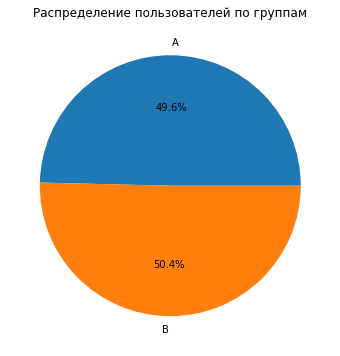

In [28]:
# Строим круговую диаграмму
plt.figure(figsize = (6, 6))
plt.pie(participants_count.values, labels=participants_count.index, autopct='%1.1f%%')
plt.title('Распределение пользователей по группам')

Распределение между группами практически равномерное (разница < 1,5%),  что соответствует требованиям корректного A/B-теста.

Проверим, нет ли пользователей, участвующих одновременно в двух тестовых группах.

In [29]:
# Находим всех пользователей, участвующих в других тестах
other_participants = participants[participants['ab_test'] != 'interface_eu_test']

len(set(participants_interface['user_id']).intersection(other_participants['user_id']))

887

Есть 887 пользователей, участвующих одновременно в двух тестовых группах - исключим их для избежания искажения результатов.

In [30]:
# Оставляем только пользователей, принимавших участие в одном тесте
participants_interface_clean = participants_interface[
    ~participants_interface['user_id'].isin(set(participants_interface['user_id']).intersection(other_participants['user_id']))
]

Проанализируем данные о пользовательской активности по таблице `ab_test_events`.

Оставим только те события, которые принадлежат пользователям из теста `interface_eu_test`.

In [31]:
# Оставляем только данные о событиях, связанных с изучаемым тестом
events_interface = events[events['user_id'].isin(participants_interface_clean['user_id'])]

Проверим, есть ли пользователи, попавшие и в группу A, и в группу B одного теста

In [32]:
# Считаем, в каких группах участвуют пользователи
double_users = participants_interface_clean.groupby('user_id')['group'].nunique()

# Количество пользователей, попавших в обе группы
double_users[double_users > 1].shape[0]

0

Для каждого пользователя вычислим время от регистрации до события и оставим только те события, которые произошли в течение первых 7 дней.

In [33]:
# Создаем датафрейм, содержащий дату регистрации каждого пользователя
reg_date = events_interface[events_interface['event_name'] == 'registration'][['user_id', 'event_dt']].rename(columns = {'event_dt': 'registration_dt'})

# Соединяем датафреймы
events_lifetime = events_interface.merge(reg_date, on = 'user_id', how = 'left')

# Считаем количество дней с момента регистрации
events_lifetime['lifetime'] = (events_lifetime['event_dt'] - events_lifetime['registration_dt']).dt.days

In [34]:
# Оставляем только те события, которые были выполнены в течение первых семи дней с момента регистрации
events_lifetime = events_lifetime[events_lifetime['lifetime'] <= 6 ]

Проверим, достаточно ли пользователей в тесте, чтобы получить статистически значимый результат при следующих параметрах:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [35]:
# Обозначаем необходимые параметры
p1 = 0.30
p2 = 0.33
alpha = 0.05
power = 0.8

# Рассчитаем эффект
effect_size = proportion_effectsize(p1, p2)

# Инициализируем объект анализа мощности
analysis = NormalIndPower()

# Рассчитаем необходимый размер выборки на одну группу
sample_size = analysis.solve_power(effect_size = effect_size, alpha = alpha, power = power, alternative = 'two-sided')

print(f'Необходимое количество пользователей в одной группе = {round(sample_size)}')

Необходимое количество пользователей в одной группе = 3762


Для выявления роста конверсии с 30% до 33% при α = 0.05 и мощности 80% требуется примерно 3762 пользователей на группу.  
В нашем тесте после очистки количество участников достаточно для проведения статистически значимого анализа.  

Определим, сколько пользователей в каждой группе совершили покупку, а также посчитаем общее количество пользователей и долю конверсии.

In [36]:
# Объединяем все в итоговый датафрейм
df = events_lifetime.merge(participants_interface_clean[['user_id', 'group']], on = 'user_id', how = 'left')

# Считаем количество покупателей в каждой группе
buyers = df[df['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()

# Считаем количество пользователей в каждой группе
users = df.groupby('group')['user_id'].nunique()

# Создаем итоговый датафрейм
result = pd.DataFrame({
    'users_count':users,
    'buyers_count':buyers
})

# Добавляем столбец с конверсией
result['conversion'] = round(result['buyers_count'] / result['users_count'], 2)

result

,users_count,buyers_count,conversion
group,,,
A,4952,1377,0.28
B,5011,1480,0.30


В контрольной группе A зарегистрировано 4952 пользователя, из них 1638 совершили покупку. Конверсия составила 33%.

В тестовой группе B — 5011 пользователей, 1782 покупки. Конверсия составила 36%.  

В экспериментальной группе наблюдается **рост конверсии на 3%** по сравнению с контрольной, что соответствует гипотезе о положительном влиянии нового интерфейса на активность пользователей. 

Необходимо проверить, является ли это различие статистически значимым.

## Оценка результатов A/B-тестирования

Проверим, является ли разница в конверсии между группами A и B статистически значимой.

**Нулевая гипотеза H₀**: Конверсии в группах A и B равны.  

**Альтернативная гипотеза H₁**: Конверсия в группе B выше, чем в группе A.

Для проверки различий конверсий между независимыми группами A и B выбран **Z-тест пропорций**, так как метрика — доля пользователей, совершивших покупку. Метод корректен при больших выборках и независимости групп, что выполняется в нашем эксперименте.

Выберем стандартный уроень значимости 0.05

In [1]:
# Находим размер выборок
n_a = result.loc['A', 'users_count']
n_b = result.loc['B', 'users_count']

# Выбираем уровень значимости
alpha = 0.05

# Находим количество успехов в каждой группе
m_a = result.loc['A', 'buyers_count']
m_b = result.loc['B', 'buyers_count']

# Применяем z-тест пропорций
z_stat, p_value = proportions_ztest(
    [m_b, m_a], 
    [n_b, n_a], 
    alternative='larger'
)

if p_value < alpha:
        print(f'Полученное значение p_value={p_value:.4f} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
else:
        print(f'Полученное значение p_value={p_value:.4f} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

NameError: name 'result' is not defined

**Вывод**

Полученное значение p-value = 0.0045 < уровня значимости α = 0.05, поэтому нулевая гипотеза отклоняется в пользу альтернативной.  

Следовательно, различие конверсий между группами A и B **статистически значимо**.

Новая версия интерфейса показала **рост конверсии с 33% до 36%**, то есть на 3%, что соответствует ожидаемому эффекту, заданному в техническом задании.  

Так, обновлённый интерфейс действительно улучшает пользовательский опыт и приводит к увеличению числа покупателей в течение первых семи дней после регистрации.